## Final Activity 1

#### Objectives:
- Develop regression models for a given dataset and interpret the regression models.
- Evaluate the regression models based on the regression metrics.

#### Simple Linear Regression (SLR)

Predict how much discount should be given considering any damage in the house. The dataset has a column for number of damages and another column for the discount that can be given (around USD 1 for every damage discovered)

#### Multiple Linear Regression (MLR)

Predict the possible price of a house by correlating the price column with ONLY the following attributes/columns in the dataset:
- size (in square meters)
- number of bedrooms
- number of bathrooms
- number of extra rooms
- presence of a garage (0 - no, 1- yes)
- presence of a garden (0 - no, 1- yes)
- if the house is in a subdivision (0 - no, 1- yes)
- if the house is located in a city (0 - no, 1- yes)
- if the house is solar powered (0 - no, 1- yes)

In [227]:
# Import Dataset
import pandas as pd
import numpy as np

raw = pd.read_csv('data/housePriceData.csv')

raw

,size,bedrooms,bathrooms,extraRooms,garage,garden,inSubdivision,inCity,solarPowered,price,damages,discount
0,164,2,2,3,0,0,0,1,1,43800,77,79.775152
1,84,2,4,2,0,1,1,0,1,37550,21,23.177279
2,190,2,4,2,1,0,0,1,0,49500,22,25.609262
3,75,2,4,1,0,1,1,1,1,50075,20,17.857388
4,148,1,2,2,1,1,0,0,1,52400,36,41.849864
...,...,...,...,...,...,...,...,...,...,...,...,...
295,234,2,5,1,0,0,0,0,0,27600,71,68.545888
296,73,1,3,2,1,1,0,0,0,46825,46,47.334876
297,32,3,5,3,1,0,0,1,1,55750,55,54.090637
298,118,3,1,3,0,0,1,0,1,28400,62,63.297171


### Separate columns and split train-test data

In [228]:
from sklearn.model_selection import train_test_split

# Separate columns by model
slr_features = raw[['damages']].copy()
slr_target = raw['discount'].copy()
mlr_features = raw[['size', 'bedrooms', 'bathrooms', 'extraRooms', 'garage', 'garden', 'inSubdivision', 'inCity',
                    'solarPowered']].copy()
mlr_target = raw['price'].copy()

slr_features_train, slr_features_test, slr_target_train, slr_target_test = train_test_split(
    slr_features, slr_target, test_size=0.1
)

mlr_features_train, mlr_features_test, mlr_target_train, mlr_target_test = train_test_split(
    mlr_features, mlr_target, test_size=0.1
)

## Simple Linear Regression

a. Display the descriptive statistics of the discount amounts

In [229]:
discount_stats = slr_features_train.describe()
print("Descriptive Statistics for Discount Amounts:")
discount_stats

Descriptive Statistics for Discount Amounts:


,damages
count,270.000000
mean,51.688889
std,28.852005
min,0.000000
25%,27.000000
50%,55.000000
75%,74.000000
max,100.000000


b. Create a scatter plot using the “damages” column as the independent variable and the “discount” column as the dependent variable.

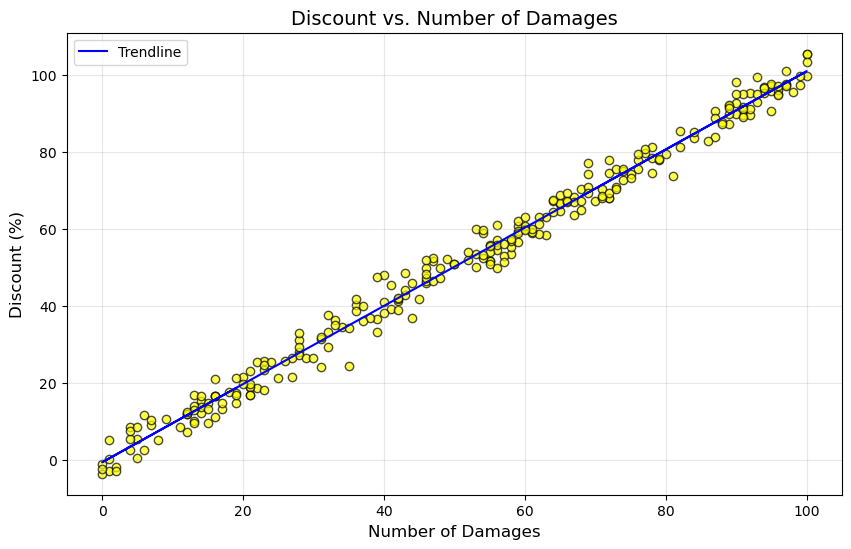

In [230]:
import matplotlib.pyplot as plt

slr_train_data = pd.concat([slr_features_train, slr_target_train], axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(slr_train_data['damages'], slr_train_data['discount'], color='yellow', edgecolor='black', alpha=0.7)
plt.title('Discount vs. Number of Damages', fontsize=14)
plt.xlabel('Number of Damages', fontsize=12)
plt.ylabel('Discount (%)', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.3)

z = np.polyfit(slr_train_data['damages'], slr_train_data['discount'], 1)
p = np.poly1d(z)
plt.plot(slr_train_data['damages'], p(slr_train_data['damages']), color='blue', linestyle='-', label='Trendline')

plt.legend()
plt.show()

c. Determine the correlation between the “damages” and “discount” columns.

In [231]:
correlation = slr_train_data[['damages', 'discount']].corr().iloc[0, 1]
print(f"Correlation between Damages and Discount: {correlation:.2f}")

Correlation between Damages and Discount: 0.99


d. Create a simple linear regression model using the “damages” column as the independent variable and the “discount” column as the dependent variable.

In [232]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
slr_model = LinearRegression()
slr_model.fit(slr_features_train, slr_target_train)

# Get the slope (coefficient) and intercept
slope = slr_model.coef_[0]
intercept = slr_model.intercept_

print(f"SLR Equation: discount = {intercept:.2f} + {slope:.2f} * damages")
print(f"Slope (damages coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

SLR Equation: discount = -0.50 + 1.02 * damages
Slope (damages coefficient): 1.02
Intercept: -0.50


e. Evaluate the developed regression model based on different performance metrics and discuss the OLS regression results.

In [233]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Predict on test data
slr_predictions = slr_model.predict(slr_features_train)

# Calculate metrics
slr_mae = mean_absolute_error(slr_target_train, slr_predictions)
slr_mse = mean_squared_error(slr_target_train, slr_predictions)
slr_rmse = root_mean_squared_error(slr_target_train, slr_predictions)

print(f"MAE: {slr_mae:.2f}")
print(f"MSE: {slr_mse:.2f}")
print(f"RMSE: {slr_rmse:.2f}")

MAE: 2.41
MSE: 9.31
RMSE: 3.05


In [234]:
# OLS Regression
import statsmodels.api as sm

# Add a constant (intercept) to the features
slr_X_train = sm.add_constant(slr_features_train)
slr_ols_model = sm.OLS(slr_target_train, slr_X_train).fit()

# Print OLS summary
slr_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.462e+04
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          9.86e-266
Time:                        18:38:15   Log-Likelihood:                -684.26
No. Observations:                 270   AIC:                             1373.
Df Residuals:                     268   BIC:                             1380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4987      0.383     -1.302      0.194      -1.252       0.255
damages        1.0153      0.006    156.912      0.000       1.003       1.028
==============================================================================
Omnibus:                        0.728   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.476
Skew:                           0.064   Prob(JB):                        0.788
Kurtosis:                       3.161   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f. Predict the discount amounts on the remaining 10% unseen data.

In [235]:
# Predict discounts for the test set (10% unseen data)
slr_test_predictions = slr_model.predict(slr_features_test)

# Create a DataFrame to compare actual vs. predicted discounts
slr_results = pd.DataFrame({
    'Actual Discount': slr_target_test,
    'Predicted Discount': slr_test_predictions,
    'Error (Difference Actual vs. Predicted)': np.abs(slr_target_test - slr_test_predictions)
})

print("Predictions on Unseen Test Data:")
slr_results.round(2)

Predictions on Unseen Test Data:


,Actual Discount,Predicted Discount,Error (Difference Actual vs. Predicted)
171,40.04,37.07,2.97
81,23.44,26.92,3.47
187,56.43,51.28,5.15
184,34.12,37.07,2.94
281,30.41,24.88,5.53
177,36.06,31.99,4.07
21,46.91,51.28,4.37
198,19.39,18.79,0.60
185,6.08,3.56,2.52
191,72.86,73.62,0.76


## Multiple Linear Regression

a. Display the descriptive statistics of the selling price amounts.

In [236]:
mlr_train_data = pd.concat([mlr_features_train, mlr_target_train], axis=1)
# Descriptive statistics for the 'price' column
price_stats = mlr_train_data['price'].describe()

# Print formatted output
print("Descriptive Statistics for House Selling Prices:")
price_stats

Descriptive Statistics for House Selling Prices:


count      270.000000
mean     42011.388889
std      12727.157993
min      11125.000000
25%      32762.500000
50%      40562.500000
75%      51262.500000
max      69750.000000
Name: price, dtype: float64

b. Create a multiple linear regression model using the “price” column as the dependent variable and the following columns as the independent variables:
- size
- bedrooms
- bathrooms
- extra rooms
- garage
- garden
- inSubdivision
- inCity
- solarPowered

In [237]:
mlr_model = LinearRegression()
mlr_model.fit(mlr_features_train, mlr_target_train)

# Get feature names and coefficients
coefficients = mlr_model.coef_

mlr_coefficients = pd.DataFrame({
    'Feature': mlr_features_train.columns,
    'Coefficient': coefficients
})

# Add intercept
intercept = mlr_model.intercept_

equation = "price = {:.2f} + {:.2f}*size + {:.2f}*bedrooms + \n{:.2f}*bathrooms + {:.2f}*extraRooms + {:.2f}*garage + \n{:.2f}*garden + {:.2f}*inSubdivision + \n{:.2f}*inCity + {:.2f}*solarPowered".format(
    intercept, coefficients[0], coefficients[1], coefficients[2],
    coefficients[3], coefficients[4], coefficients[5],
    coefficients[6], coefficients[7], coefficients[8]
)

print("MLR Equation:")
print(equation)
print(f"\nIntercept: {intercept:.2f}")
print("MLR Model Coefficients:")
mlr_coefficients

MLR Equation:
price = 7630.90 + 23.98*size + 1585.66*bedrooms + 
1414.56*bathrooms + 3524.78*extraRooms + 9106.96*garage + 
15057.32*garden + -5025.61*inSubdivision + 
11705.05*inCity + 4333.83*solarPowered

Intercept: 7630.90
MLR Model Coefficients:


,Feature,Coefficient
0,size,23.984994
1,bedrooms,1585.661757
2,bathrooms,1414.555508
3,extraRooms,3524.779469
4,garage,9106.958834
5,garden,15057.315018
6,inSubdivision,-5025.605125
7,inCity,11705.048097
8,solarPowered,4333.831352


c. Evaluate the developed multiple regression model based on different performance metrics

In [238]:
# Performance Metrics
# Predict on test set
mlr_predictions = mlr_model.predict(mlr_features_train)

# Calculate metrics
mlr_mae = mean_absolute_error(mlr_target_train, mlr_predictions)
mlr_mse = mean_squared_error(mlr_target_train, mlr_predictions)
mlr_rmse = root_mean_squared_error(mlr_target_train, mlr_predictions)

print(f"\nModel Performance:")
print(f"MAE: ${mlr_mae:.2f}")
print(f"MSE: ${mlr_mse:.2f}")
print(f"RMSE: ${mlr_rmse:.2f}")


Model Performance:
MAE: $998.03
MSE: $1497815.55
RMSE: $1223.85


In [239]:
# OLS Regression
mlr_X_train = sm.add_constant(mlr_features_train)
mlr_ols_model = sm.OLS(mlr_target_train, mlr_X_train).fit()

mlr_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3084.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          1.36e-258
Time:                        18:38:15   Log-Likelihood:                -2302.7
No. Observations:                 270   AIC:                             4625.
Df Residuals:                     260   BIC:                             4661.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7630.9045    399.353     19.108      0.000    6844.527    8417.282
size             23.9850      1.055     22.736      0.000      21.908      26.062
bedrooms       1585.6618     94.153     16.841      0.000    1400.262    1771.062
bathrooms      1414.5555     54.824     25.802      0.000    1306.600    1522.511
extraRooms     3524.7795     94.438     37.324      0.000    3338.818    3710.741
garage         9106.9588    190.588     47.784      0.000    8731.667    9482.251
garden         1.506e+04    153.973     97.792      0.000    1.48e+04    1.54e+04
inSubdivision -5025.6051    189.404    -26.534      0.000   -5398.566   -4652.644
inCity         1.171e+04    152.983     76.512      0.000    1.14e+04     1.2e+04
solarPowered   4333.8314    156.197     27.746      0.000    4026.260    4641.403
==============================================================================
Omnibus:                       11.059   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.183
Skew:                           0.007   Prob(JB):                       0.0749
Kurtosis:                       2.321   Cond. No.                         803.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Predict the house prices on the remaining 10% unseen data.

In [240]:
# Predict discounts for the test set (10% unseen data)
mlr_test_predictions = mlr_model.predict(mlr_features_test)

# Create a DataFrame to compare actual vs. predicted discounts
mlr_results = pd.DataFrame({
    'Actual Discount': mlr_target_test,
    'Predicted Discount': mlr_test_predictions,
    'Error (Difference Actual vs. Predicted)': np.abs(mlr_target_test - mlr_test_predictions)
})

print("Predictions on Unseen Test Data:")
mlr_results.round(2)

Predictions on Unseen Test Data:


,Actual Discount,Predicted Discount,Error (Difference Actual vs. Predicted)
222,50325,50536.78,211.78
139,57950,58135.21,185.21
154,52125,54530.32,2405.32
242,40400,38131.24,2268.76
280,45875,46281.23,406.23
206,37900,39129.21,1229.21
127,38675,38036.76,638.24
173,49100,49009.47,90.53
40,55425,57291.10,1866.10
35,48950,46717.39,2232.61
